# Integrate the original 10 classifier into 3 classifier, then backroll the code above.

The maximum acurracy is: 110==>0.9520833333333333
The maximum acurracy is: 120==>0.9520833333333333
The maximum acurracy is: 140==>0.9520833333333333
The maximum acurracy is: 150==>0.9520833333333333
The maximum acurracy is: 160==>0.9520833333333333
The maximum acurracy is: 180==>0.9520833333333333
The maximum acurracy is: 240==>0.9520833333333333
The maximum acurracy is: 250==>0.9520833333333333
The maximum acurracy is: 260==>0.9520833333333333
The maximum acurracy is: 270==>0.9520833333333333
The maximum acurracy is: 280==>0.9520833333333333
The maximum acurracy is: 380==>0.9520833333333333
The maximum acurracy is: 390==>0.9520833333333333
The maximum acurracy is: 400==>0.9520833333333333
The maximum acurracy is: 410==>0.9520833333333333
The maximum acurracy is: 420==>0.9520833333333333
The maximum acurracy is: 430==>0.9520833333333333
The maximum acurracy is: 440==>0.9520833333333333
The maximum acurracy is: 450==>0.9520833333333333
The maximum acurracy is: 460==>0.9520833333333333


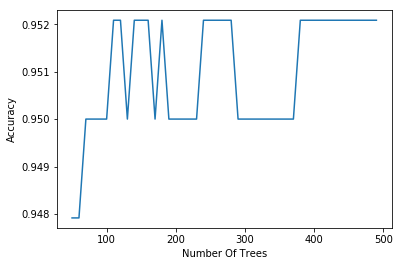

In [2]:
import numpy
import csv
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot


data2=open("winequality-red.csv")
xlist2 = []
labels2 = []
firstline = True
for line in data2:
    if firstline:
        row=line.strip().split(';')
        firstline = False
    else:
        row=line.strip().split(';')
        labels2.append(float(row[-1]))
        floatrow = [float(row[i]) for i in range(6,11)]
        xlist2.append(floatrow)
three_labels = []
for i in labels2:
    if(i<=4):
        i = 1
        three_labels.append(i)
    elif(4<i<=7):
        i = 2
        three_labels.append(i)
    elif(7<i<=10):
        i = 3
        three_labels.append(i)      
x2=numpy.array(xlist2)
y2=numpy.array(three_labels)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.30,random_state=531)

ntreelist2=range(50,500,10)
dic2 = {}
accuracy2 = []
mseoos2 = []
for itrees in ntreelist2:
    count=0
    depth=None
    maxfeat=4
    #train the Random Forest model.
    winerandomforestmodel=ensemble.RandomForestClassifier(n_estimators=itrees,max_depth=depth,max_features=maxfeat,oob_score=False,random_state=531)
    winerandomforestmodel.fit(xtrain2,ytrain2)
    #put the prediction accuracy into dictionary.
    prediction=winerandomforestmodel.predict(xtest2)
    for i in range(len(prediction)):
        if prediction[i]==ytest2[i]:
            count += 1
    accuracy2.append((count/len(prediction)))
    dic2[itrees] = count/len(prediction)
    mseoos2.append(mean_squared_error(ytest2,prediction))
for key,value in dic2.items():
    if value == max(dic2.values()):
        print('The maximum acurracy is: '+ str(key) +'==>'+str(value))
print("MSE: " + str(mseoos2[-1]))

plot.plot(ntreelist2,accuracy2)
plot.xlabel("Number Of Trees")
plot.ylabel("Accuracy")
plot.show()